# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

## 1. Create a 4 dimensional data set with 64 elements and show all 4  scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$, etc.

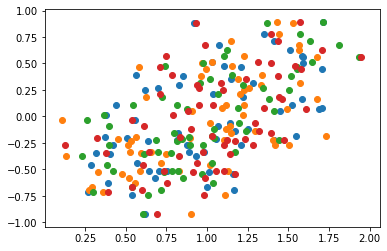

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pa

n = 64

x = np.linspace(0, 1, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

plt.scatter(x.T[0], y)
plt.scatter(x.T[1], y)
plt.scatter(x.T[2], y)
plt.scatter(x.T[3], y)


## 2.  Create a Linear Regression model to fit the data. Use the example from Lesson 3 and do not use a library that calculates automatically. We are expecting 5 coefficients to describe the linear model.

In [84]:
left = np.linalg.inv(np.dot(x.T, x))
right = np.dot(y.T, x)
beta=np.dot(left, right)

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

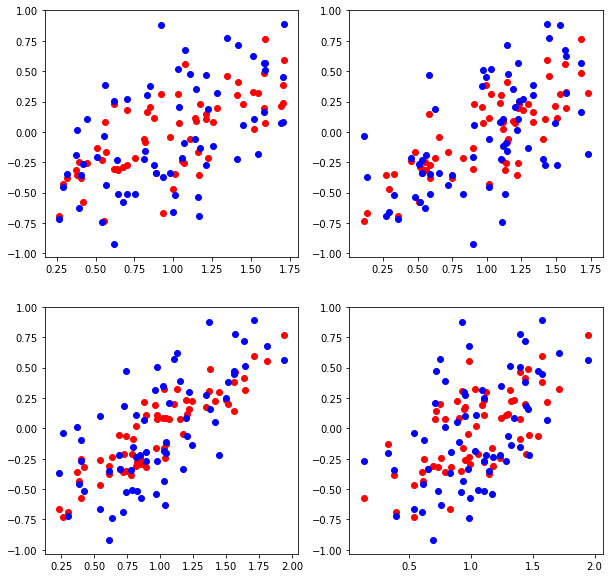

In [85]:
pred = np.dot(x, beta)


fig = plt.figure(figsize=(10, 10))


plt.subplot(2, 2, 1)
plt.scatter(x.T[0], pred, c='red')
plt.scatter(x.T[0], y, c='b')

plt.subplot(2, 2, 2)
plt.scatter(x.T[1], pred, c='red')
plt.scatter(x.T[1], y, c='b')

plt.subplot(2, 2, 3)
plt.scatter(x.T[2], pred, c='red')
plt.scatter(x.T[2], y, c='b')

plt.subplot(2, 2, 4)
plt.scatter(x.T[3], pred, c='red')
plt.scatter(x.T[3], y, c='b')

plt.show()




## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating

In [86]:
import pandas as pd
import numpy as np
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [87]:
columns = ['Income', 'Limit', 'Cards','Age','Education','Balance']
X = credit[columns].values

X = np.vstack([X.T, np.ones(len(X))]).T
X




array([[1.48910e+01, 3.60600e+03, 2.00000e+00, ..., 1.10000e+01,
        3.33000e+02, 1.00000e+00],
       [1.06025e+02, 6.64500e+03, 3.00000e+00, ..., 1.50000e+01,
        9.03000e+02, 1.00000e+00],
       [1.04593e+02, 7.07500e+03, 4.00000e+00, ..., 1.10000e+01,
        5.80000e+02, 1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 5.00000e+00, ..., 1.20000e+01,
        1.38000e+02, 1.00000e+00],
       [3.77280e+01, 2.52500e+03, 1.00000e+00, ..., 1.30000e+01,
        0.00000e+00, 1.00000e+00],
       [1.87010e+01, 5.52400e+03, 5.00000e+00, ..., 7.00000e+00,
        9.66000e+02, 1.00000e+00]])

In [88]:
y = credit['Rating']
y


left = np.linalg.inv(np.dot(X.T, X))
right = np.dot(y.T, X)
beta=np.dot(left, right)

### 5. Plot your results. Show as many of your columns vs. credit rating that you can. 

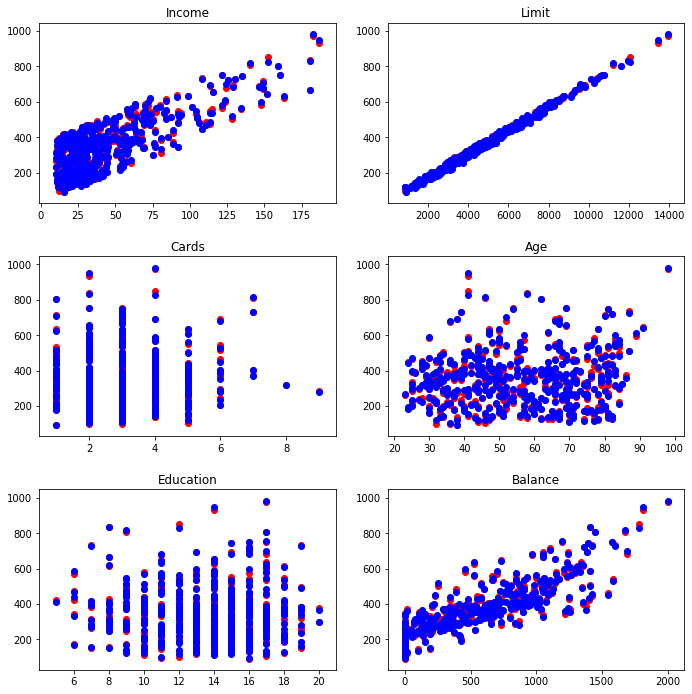

In [89]:
pred = np.dot(X, beta)



fig = plt.figure(figsize=(10, 10))
ax1=plt.subplot(3, 2, 1)
plt.scatter(X.T[0], pred, c='red')
plt.scatter(X.T[0], y, c='b')
ax1.title.set_text('Income')

ax2=plt.subplot(3, 2, 2)
plt.scatter(X.T[1], pred, c='red')
plt.scatter(X.T[1], y, c='b')
ax2.title.set_text('Limit')

ax3=plt.subplot(3, 2, 3)
plt.scatter(X.T[2], pred, c='red')
plt.scatter(X.T[2], y, c='b')
ax3.title.set_text('Cards')


ax4=plt.subplot(3, 2, 4)
plt.scatter(X.T[3], pred, c='red')
plt.scatter(X.T[3], y, c='b')
ax4.title.set_text('Age')

ax4=plt.subplot(3, 2, 5)
plt.scatter(X.T[4], pred, c='red')
plt.scatter(X.T[4], y, c='b')
ax4.title.set_text('Education')

ax4=plt.subplot(3, 2, 6)
plt.scatter(X.T[5], pred, c='red')
plt.scatter(X.T[5], y, c='b')
ax4.title.set_text('Balance')





fig.tight_layout(pad=2.0)
